**SYRIALTEL CUSTOMER CHURN PROJECT**

**USING BINARY CLASSIFICATION TO BUILD A MODEL THAT ACCURATELY PREDICTS CUSTOMER CHURN TO HELP SYRIATEL COMPANY IDENTIFY THE FACTORS CONTRIBUTING TO THE CHURN AND TAKE PROACTIVE ACTIONS TOWARDS RETAINING THEIR CUSTOMERS**

# BUSINESS OVERVIEW

SyriaTel is a telecommunication company based in Syria. The services of the company include voice and data services. Recently, the company has been concerned about the increased rate of customer churn that is resulting to high loss of revenue. The company is looking to outsource a data scientist to help identify the contributing factors that are leading to customer's opting out on the services.


# PROBLEM STATEMENT

Customer churn rate has a significant impact on any company's bottom line. This is because it causes loss of revenue and market share as there's considerable cost implications in the getting new customers and could affect company's reputation. It is more cost-effective to retain existing customers than using money to get new ones. The effects of customer churn has made it necessary for SyrialTel company to identify the factors that contribute to customer churn and take proactive steps to retain its customers. This will be achieved through developing a model that accurately predicts customer churn to allow for it to take preventive measures.

# PROJECT OBJECTIVE

**Main Objective

The primary goal of this project is to identify the factors that contribute to curstomer churn and Develop a classifier that predicts which customers are likely to churn to enable SyriaTel take appropriate actions and reduce customer attrition.

**Specific Objectives

1. Conducting a comprehensive analysis of SyriaTel's customer data to identify patterns and trends that contribute to customer churn.
2. Determining which variables have the highest impact on customer churn in SyriaTel's customer base.
3. Building and testing a predictive model to accurately forecast the likelihood of customer churn.
4. Evaluating the performance of the predictive model and comparing it with other alternative models.
5. Identifying preventive measures that SyriaTel can take to reduce customer churn and retain more customers.
6. Developing a plan to implement the preventive measures based on the insights gained from the predictive model.
7. Monitoring and tracking the impact of the preventive measures on customer churn and overall business performance over time.

## PROJECT OUTLINE

1. Exploratory Data Analysis
2. Data Cleaning
3. Univariate, Bivariate Analysis
4. Machine Learning Modelling
5. Conclusion
6. Recommendation

## 1. DATA EXPLORATION

**1.1 DATA UNDERSTANDING

The data comes from SyriaTel and includes their customer information. Tha datasets shows customer's state of residence, telephone numbers and length of the account. From the datasets we can see if a customers has subcribed to an international plan, a voice plan and the number of voice mails they recieve. Additionally the dataset includes how many minutes they spend talking, how many calls they make and how much they are charged during a day, evening and night periods

*Data Source : https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

Summary of Features in the Datset

* **state**: the state the customer lives in
* **account length**: the number of days the customer has had an account
* **area code**: the area code of the customer
* **phone number**: the phone number of the customer
* **international plan**: true if the customer has the international plan, otherwise false
* **voice mail plan**: true if the customer has the voice mail plan, otherwise false
* **number vmail messages**: the number of voicemails the customer has sent
* **total day minutes**: total number of minutes the customer has been in calls during the day
* **total day calls**: total number of calls the user has done during the day
* **total day charge**: total amount of money the customer was charged by the Telecom company for calls during the day
* **total eve minutes**: total number of minutes the customer has been in calls during the evening
* **total eve calls**: total number of calls the customer has done during the evening
* **total eve charge**: total amount of money the customer was charged by the Telecom company for calls during the evening
* **total night minutes**: total number of minutes the customer has been in calls during the night
* **total night calls**: total number of calls the customer has done during the night
* **total night charge**: total amount of money the customer was charged by the Telecom company for calls during the night
* **total intl minutes**: total number of minutes the user has been in international calls
* **total intl calls**: total number of international calls the customer has done
* **total intl charge**: total amount of money the customer was charged by the Telecom company for international calls
* **customer service calls**: number of calls the customer has made to customer service
* **churn**: true if the customer terminated their contract, otherwise false

*Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_recall_curve, f1_score
, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category

**1.2 LOAD AND EXPLORE DATA**

In [4]:
df = pd.read_csv("churn_telcom.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


* Check number of columns, missing data,and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We have no missing values
Data has both continuous and categorical features comprising of the following data types; objects, integers, float and booleans

* check number of rows and columns

In [6]:
df.shape

(3333, 21)

* check statistics overview of each column

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


* Check for Unique Values

In [8]:
for dataset in df:
    print("For {},{} unique values present".format(dataset,df[dataset].nunique()))

For state,51 unique values present
For account length,212 unique values present
For area code,3 unique values present
For phone number,3333 unique values present
For international plan,2 unique values present
For voice mail plan,2 unique values present
For number vmail messages,46 unique values present
For total day minutes,1667 unique values present
For total day calls,119 unique values present
For total day charge,1667 unique values present
For total eve minutes,1611 unique values present
For total eve calls,123 unique values present
For total eve charge,1440 unique values present
For total night minutes,1591 unique values present
For total night calls,120 unique values present
For total night charge,933 unique values present
For total intl minutes,162 unique values present
For total intl calls,21 unique values present
For total intl charge,162 unique values present
For customer service calls,10 unique values present
For churn,2 unique values present


* Check for duplicates

In [9]:
df.duplicated().sum()

0

From the results of the table above, we can see that this is a small datasets that contains 3333 rows and 21 columns. There are no missing values and no duplicates. With this, we can jump direct to Data analysis.

## 2. DATA ANALYSIS

**2.1 Univariate Analysis**

* Let's explore "churn rate" which is our "Target Variable"

In [10]:
#Check total count of current customers that have churned (True) and those that didn't (False)
print(df.churn.value_counts())

False    2850
True      483
Name: churn, dtype: int64


In [11]:
#Check percent of current customers that have churned (True) and those that didn't (False)
df["churn"].value_counts(normalize=True) * 100

False    85.508551
True     14.491449
Name: churn, dtype: float64

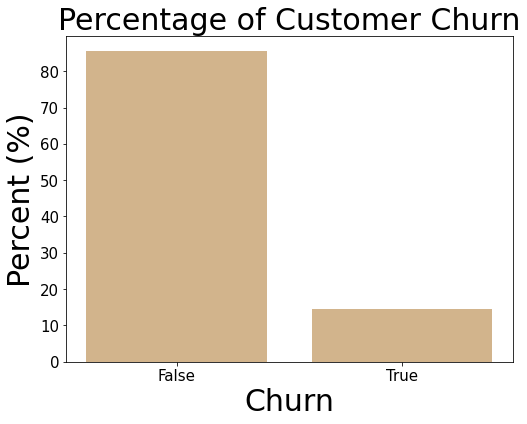

In [12]:
#Let's visualize the churn rate
fig,ax = plt.subplots(figsize=(8,6))
plt.bar(x = df["churn"].unique(), height = round(df["churn"].value_counts(normalize=True)*100, 2), color= "tan")
plt.xticks(ticks=[0,1], labels=["False", "True"], fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xlabel("Churn", fontsize = 30)
ax.set_ylabel("Percent (%)", fontsize = 30)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_title("Percentage of Customer Churn",fontsize = 30)
plt.show()

Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost.
The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

**2.2 Bivariate Analysis**

* Let's group the data by "State" and see if we can i.d. a trend/pattern i.e. which states have the highest churn rate.

In [13]:
#groups states and looks at churn and not churn rates 
states = df.groupby('state')['churn'].value_counts(normalize=True)
states = pd.DataFrame(states)
states.columns = ['percent']
states = states.reset_index()
states

,state,churn,percent
0,AK,False,0.942308
1,AK,True,0.057692
2,AL,False,0.900000
3,AL,True,0.100000
4,AR,False,0.800000
...,...,...,...
97,WI,True,0.089744
98,WV,False,0.905660
99,WV,True,0.094340
100,WY,False,0.883117


From the above table we can see the different states rate of retention and rate in a descending order

* Let's check churn rate per state

In [14]:
states_churn_rate = states.loc[states['churn'] == True].sort_values("percent", ascending =False)\
                                                        .reset_index().drop("index", axis =1)
states_churn_rate.head(10)

,state,churn,percent
0,NJ,True,0.264706
1,CA,True,0.264706
2,TX,True,0.250000
3,MD,True,0.242857
4,SC,True,0.233333
5,MI,True,0.219178
6,MS,True,0.215385
7,NV,True,0.212121
8,WA,True,0.212121
9,ME,True,0.209677


The results show that 0.26% churn rate is the highest 

Let's add a function that helps add a column that indicates which category of churn rate a customer is in based on state i.e. high, medium, medium-low or low

In [15]:
def categorize_data(df, col_name):
    """
    Categorizes data in the given column of the given DataFrame into one of four categories:
    "high", "medium", "medium-low", or "low", based on the specific thresholds.
    Adds the new column with the category labels to the DataFrame.
    Returns the new DataFrame with the added column.
    """
    conditions = [
        df[col_name] > 0.21,
        (df[col_name] > 0.15) & (df[col_name] <= 2),
        (df[col_name] > 1) & (df[col_name] <= 0.15),
        df[col_name] <= 1
    ]
    choices = ['high', 'medium', 'medium-low', 'low']
    df['churn_category'] = pd.Series(pd.Categorical(np.select(conditions, choices)))
    return df

In [16]:
new_df = categorize_data(states_churn_rate, 'churn')
new_df.head()

,state,churn,percent,churn_category
0,NJ,True,0.264706,high
1,CA,True,0.264706,high
2,TX,True,0.250000,high
3,MD,True,0.242857,high
4,SC,True,0.233333,high


In [17]:
new_df = categorize_data(df, 'churn')
new_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,churn_category
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,low
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,low
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,low
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,low
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,low


The dataset now contains an additional row that is able to show the churn category a customer is in based on state

* Boxplot to see which area code has the highest churn

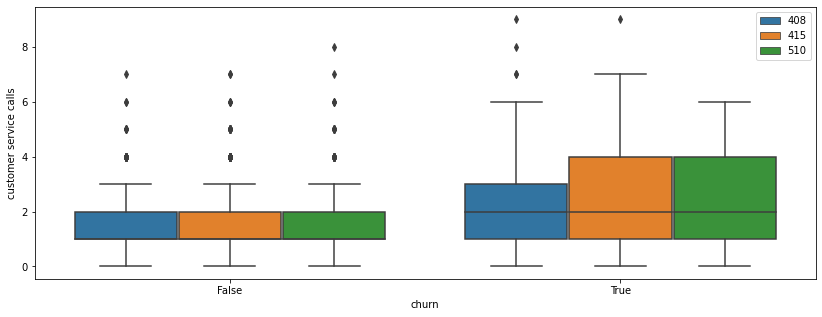

In [18]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');

There are outliers, in all area codes, amongst the customers who have not terminated their accounts.
Of the customers who have terminated their account, they more likely have a 415 or a 510 area code.

Now we have a general idea of our data, let's define numerical and categorical columns

To help us understand the churn and retention rate better let's determine how many customers we have per state 

In [19]:
# Group the dataframe by state code and count the number of customers in each group
summary = df.groupby(['state'])['phone number'].count()
top10 = summary.nlargest(10)
top10

state
WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
Name: phone number, dtype: int64

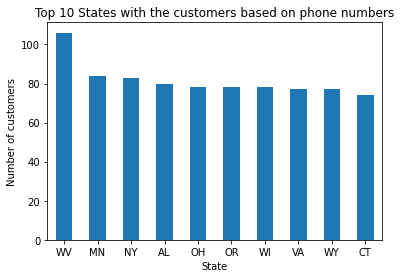

In [20]:
# Plot the result as a bar chart
top10.plot(kind='bar', rot=0)
plt.title('Top 10 States with the customers based on phone numbers')
plt.xlabel('State')
plt.ylabel('Number of customers')
plt.show()

From the above we can see the top 10 statest that had the highest number of customers

**2.3 Multivariate Analysis**

*2.3.1 Numerical Features Analysis**

In [21]:
#Define Numerical columns (we classify anything with a float or integer data type as a numerical column)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [22]:
# select only the numerical columns
num_cols = df.select_dtypes(include=["number"])

# create a new DataFrame from the numerical columns
num_df = pd.DataFrame(num_cols)
num_df

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


* Let's check how the numerical features are distributed

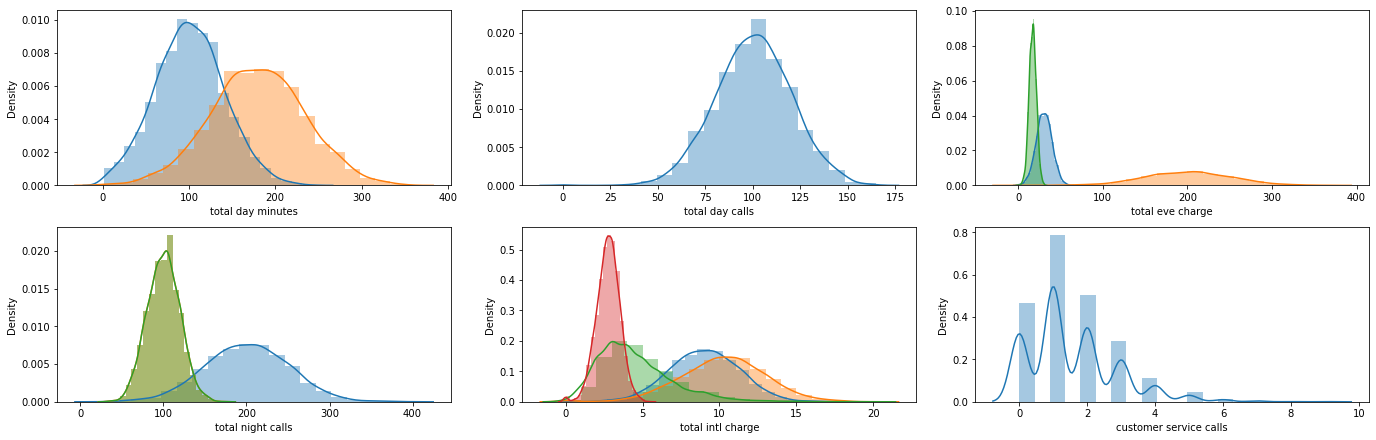

In [23]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(num_df["account length"],bins=20,ax=ax[0,0]);
sns.distplot(num_df["total day minutes"],bins=20,ax=ax[0,0]);
sns.distplot(num_df["total day calls"],bins=20,ax=ax[0,1]);
sns.distplot(num_df["total day charge"],bins=20,ax=ax[0,2]);
sns.distplot(num_df["total eve minutes"],bins=20,ax=ax[0,2]);
sns.distplot(num_df["total eve charge"],bins=20,ax=ax[0,2]);
sns.distplot(num_df["total night minutes"],bins=20,ax=ax[1,0]);
sns.distplot(num_df["total night calls"],bins=20,ax=ax[1,0]);
sns.distplot(num_df["total night calls"],bins=20,ax=ax[1,0]);
sns.distplot(num_df["total night charge"],bins=20,ax=ax[1,1]);
sns.distplot(num_df["total intl minutes"],bins=20,ax=ax[1,1]);
sns.distplot(num_df["total intl calls"],bins=20,ax=ax[1,1]);
sns.distplot(num_df["total intl charge"],bins=20,ax=ax[1,1]);
sns.distplot(num_df["customer service calls"],bins=20,ax=ax[1,2]);

The sns.displot did not print all features let's see if matplotlib histplots will capture all features

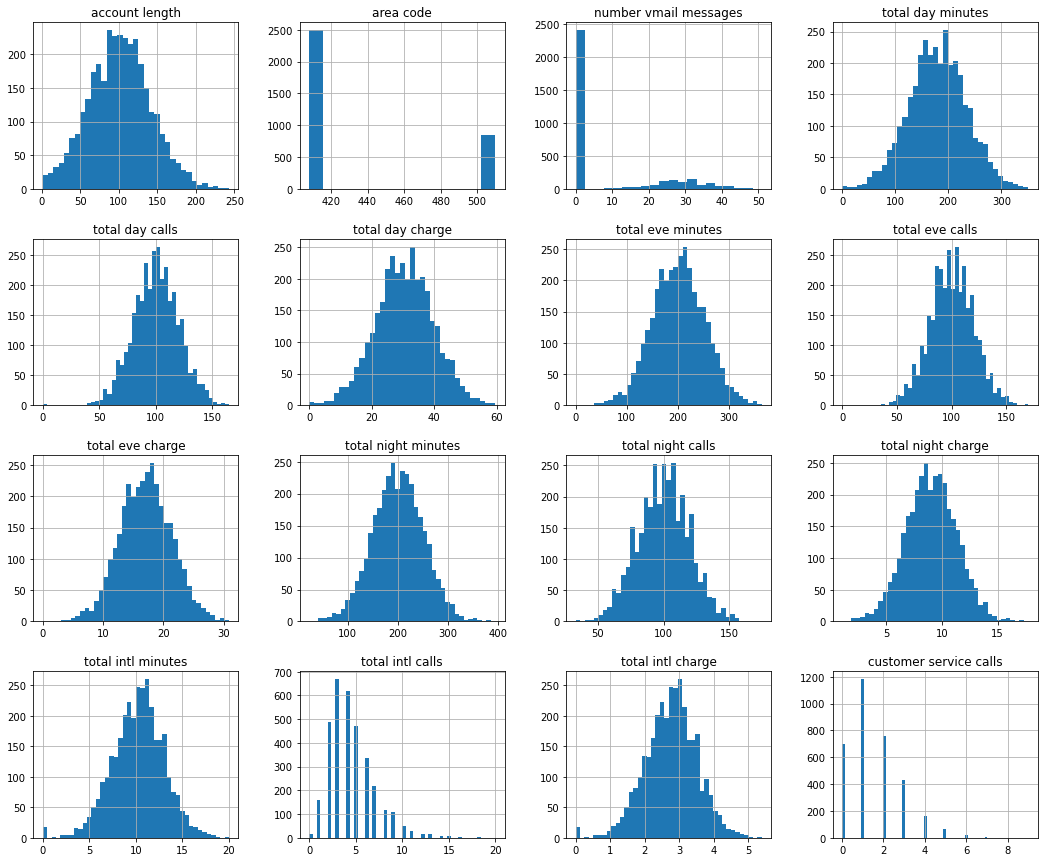

In [24]:
num_df.hist(figsize=(18,15), bins="auto");

We observe that most of the data is normally distributed except for total intl calls, customer service calls, area code and voice message plan.

* Pairplots for Numeric Features (Hue as "Churn")

let's do a pairplot to see how the features relate to each other using hue = "churn"

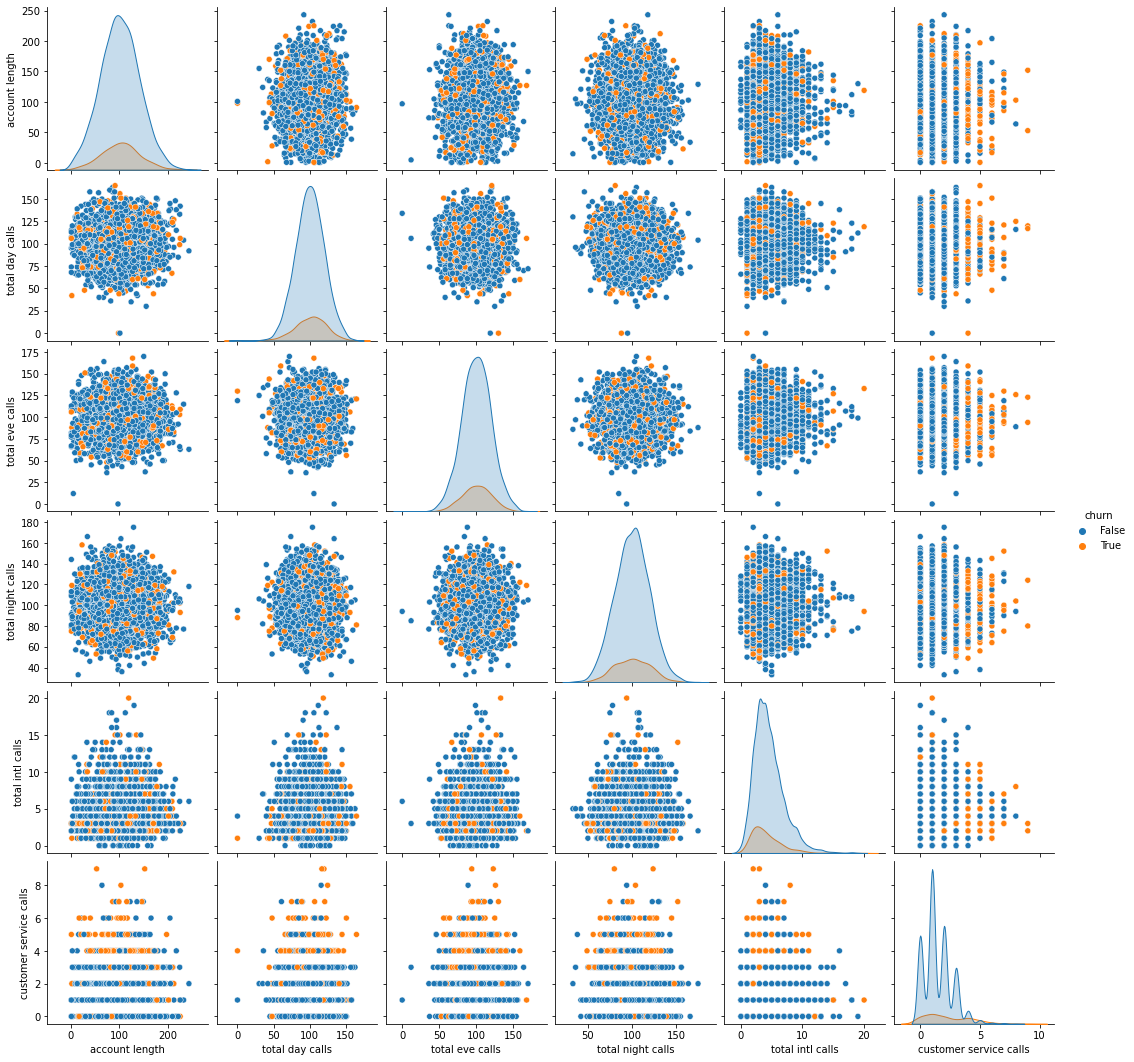

In [25]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

- Customers with shorter account length had higher churn rates
- Customers that had few day calls had a higher churn rate
- Customers that had few eve calls had a higher churn rate
- Customers that had few international calls had higher churn rate although the data is positively skewed
- Customers with 0 - 5 customers service calls had a higher churn rate

**Check for Correlation** 

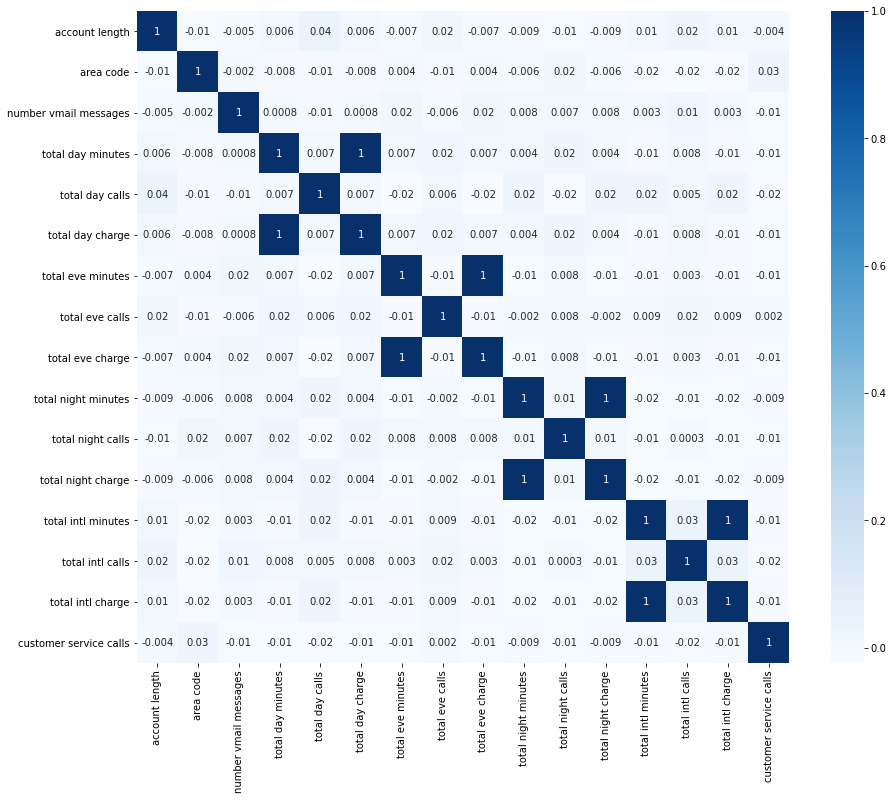

In [26]:
corr_mat = num_df.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);


Dark Blue shows high correlation; from the observation all dark blues 1 diagonally is correlation of a feature to itself. Therefore, Dark blue 1 outside the diagonal 1's shows the features that are highly correlted. In this case total day minutes and total day charge, total eve minutes and total eve charge,total night minutes and total night charge, and total intl minutes and total intl charge.
NB; We will need to drop highly correlated features before modelling


**Dealing with Multicollinearity**

In [27]:
#Let's check for Multicollinearity

df_corr = num_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace = True)

df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

,cc
pairs,
"(total day minutes, total day charge)",1.000000
"(total eve charge, total eve minutes)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993


The above shows the multicollineared features; the results is true as high total minutes = total charge. In for the next steps we will drop 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'.

In [28]:
df = df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], axis=1)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,churn_category
0,KS,128,415,382-4657,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,low
1,OH,107,415,371-7191,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,low
2,NJ,137,415,358-1921,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,low
3,OH,84,408,375-9999,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,low
4,OK,75,415,330-6626,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,low


*2.3.2 Categorical Features Analysis*

In [29]:
#Define Categorical columns
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category' or df[col].dtype == 'bool':
        categorical_cols.append(col)
categorical_cols

['state',
 'phone number',
 'international plan',
 'voice mail plan',
 'churn',
 'churn_category']

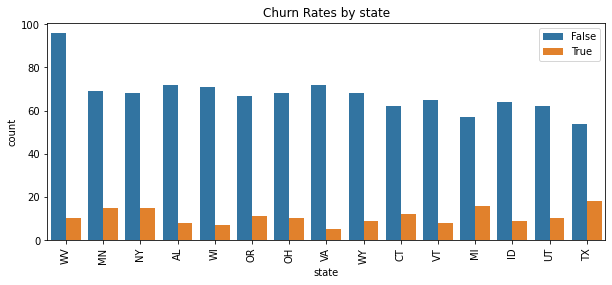

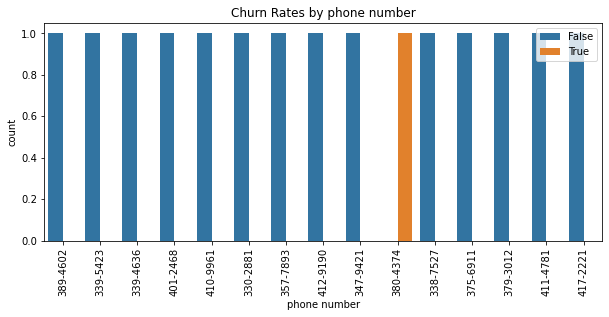

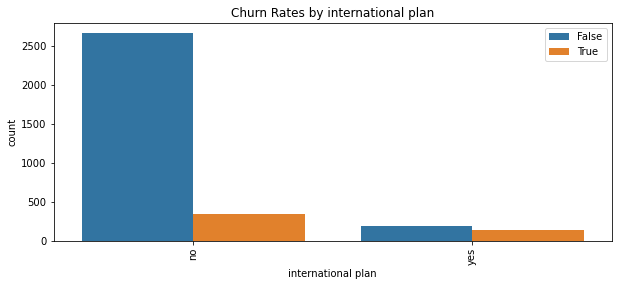

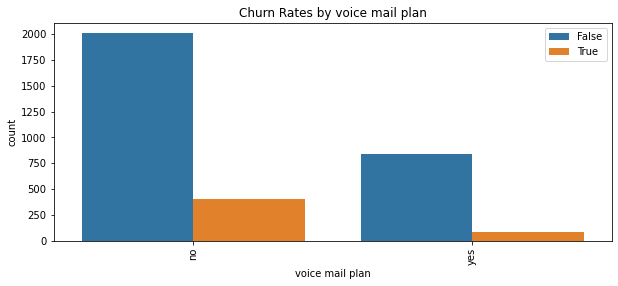

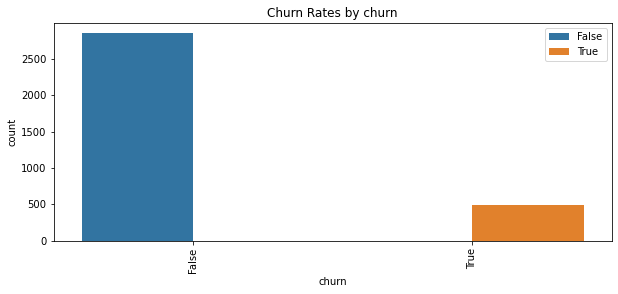

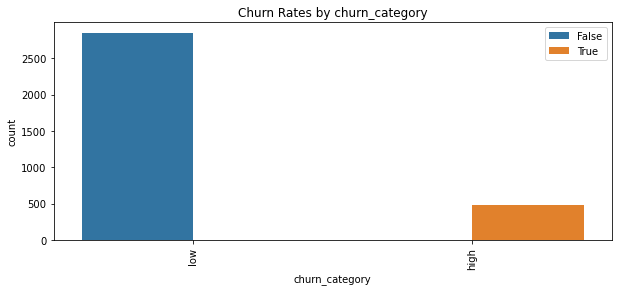

In [30]:
# iterate over each categorical column
for cat_col in categorical_cols:
    # create a figure with a specific size
    plt.figure(figsize=(10,4))
    
    # create a countplot with hue as "churn" and order based on the top 15 values
    sns.countplot(x=cat_col, hue="churn", data=df, order=df[cat_col].value_counts().iloc[0:15].index)
    
    # rotate the x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # add a legend to the chart
    plt.legend(loc="upper right")
    
    # add a title to the chart
    plt.title("Churn Rates by " + cat_col)
    
    # display the chart
    plt.show()

From  the categorical feature analysis we can see that "phone number" does not really give us any information about those that
decide to churn or not. So we will drop the column. We will also drop "churn" as this is our target variable

In [31]:
df = df.drop(['phone number', 'area code'], axis=1)

In [32]:
cat_columns = ['state', 'international plan', 'voice mail plan']
cat_columns

['state', 'international plan', 'voice mail plan']

To handle the categorical data, we shall label encode

In [33]:
#transform the categorical variable churn
label_encoder = preprocessing.LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['state'] = label_encoder.fit_transform(df['state'])
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,churn_category
0,16,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,low
1,35,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,low
2,31,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,low
3,35,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,low
4,36,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,low


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   int32   
 1   account length          3333 non-null   int64   
 2   international plan      3333 non-null   int32   
 3   voice mail plan         3333 non-null   int32   
 4   number vmail messages   3333 non-null   int64   
 5   total day calls         3333 non-null   int64   
 6   total day charge        3333 non-null   float64 
 7   total eve calls         3333 non-null   int64   
 8   total eve charge        3333 non-null   float64 
 9   total night calls       3333 non-null   int64   
 10  total night charge      3333 non-null   float64 
 11  total intl calls        3333 non-null   int64   
 12  total intl charge       3333 non-null   float64 
 13  customer service calls  3333 non-null   int64   
 14  churn                   

We have replaced for international plan "yes" to 1 and "no" to 0, for voice mail plan "yes" to 1 and "no" to 0, states to number 1 to 55 and churn "True" to 1 and "False" to 0

## 3. PREPARE DATA FOR MODELLING

**3.1 Define X and y**

In [35]:
# Split the data into target and predictors
y = df["churn"]
X = df.drop(columns=["churn", "churn_category"], axis=1)

In [36]:
df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,churn_category
0,16,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,low
1,35,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,low
2,31,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,low
3,35,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,low
4,36,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,low


**3.2 Train_Test Split**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**3.3 DEALING WITH CATEGORICAL DATA**

We had already label encoded the categorical data, because we are dealing with binary classification it's not necessary to onehot code. Do let's view how the categorical data looks like

In [38]:
X_train_categorical = X_train[cat_columns]
X_train_categorical

,state,international plan,voice mail plan
1460,26,0,0
2000,38,0,0
666,37,0,0
2962,41,0,0
2773,31,0,1
...,...,...,...
835,10,0,0
3264,39,0,1
1653,20,1,0
2607,14,0,0


In [39]:
X_test_categorical = X_test[cat_columns]
X_test_categorical

,state,international plan,voice mail plan
405,48,1,0
118,24,0,1
710,42,0,0
499,49,0,0
2594,35,1,0
...,...,...,...
2255,20,0,0
242,15,0,0
1916,31,0,0
2160,33,1,0


**3.4 Normalize Numeric columns

In [40]:
X_train_numeric = X_train[['account length','number vmail messages','total day calls','total day charge','total eve calls',
                      'total eve charge','total night calls','total night charge','total intl calls','total intl charge',
                      'customer service calls']].copy()
X_train_numeric

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
1460,80,0,160,33.68,87,13.32,76,8.19,3,2.51,3
2000,28,0,87,28.59,92,13.74,112,8.66,3,2.73,3
666,120,0,120,42.84,106,12.77,96,6.83,1,2.59,2
2962,105,0,88,42.77,103,14.88,112,8.30,5,1.46,1
2773,134,34,105,42.02,133,19.17,76,8.38,5,1.65,2
...,...,...,...,...,...,...,...,...,...,...,...
835,27,0,75,12.36,117,17.73,71,2.96,3,2.67,1
3264,89,24,98,16.63,67,17.61,126,9.65,2,1.59,0
1653,93,0,78,22.34,106,18.67,103,7.01,2,3.00,1
2607,91,0,100,32.18,107,20.34,89,4.04,3,2.67,3


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
1460,0.341991,0.000000,0.969697,0.564722,0.511765,0.430929,0.302817,0.427376,0.15,0.464815,0.333333
2000,0.116883,0.000000,0.527273,0.479376,0.541176,0.444516,0.556338,0.455469,0.15,0.505556,0.333333
666,0.515152,0.000000,0.727273,0.718310,0.623529,0.413135,0.443662,0.346085,0.05,0.479630,0.222222
2962,0.450216,0.000000,0.533333,0.717136,0.605882,0.481398,0.556338,0.433951,0.25,0.270370,0.111111
2773,0.575758,0.666667,0.636364,0.704561,0.782353,0.620188,0.302817,0.438733,0.25,0.305556,0.222222
...,...,...,...,...,...,...,...,...,...,...,...
835,0.112554,0.000000,0.454545,0.207243,0.688235,0.573601,0.267606,0.114764,0.15,0.494444,0.111111
3264,0.380952,0.470588,0.593939,0.278840,0.394118,0.569719,0.654930,0.514644,0.10,0.294444,0.000000
1653,0.398268,0.000000,0.472727,0.374581,0.623529,0.604012,0.492958,0.356844,0.10,0.555556,0.111111
2607,0.389610,0.000000,0.606061,0.539571,0.629412,0.658039,0.394366,0.179319,0.15,0.494444,0.333333


In [42]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1460 to 2732
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2666 non-null   float64
 1   number vmail messages   2666 non-null   float64
 2   total day calls         2666 non-null   float64
 3   total day charge        2666 non-null   float64
 4   total eve calls         2666 non-null   float64
 5   total eve charge        2666 non-null   float64
 6   total night calls       2666 non-null   float64
 7   total night charge      2666 non-null   float64
 8   total intl calls        2666 non-null   float64
 9   total intl charge       2666 non-null   float64
 10  customer service calls  2666 non-null   float64
dtypes: float64(11)
memory usage: 249.9 KB


* Combine the two tables i.e. categorical and numeric

In [43]:
X_train_full = pd.concat([X_train_categorical, X_train_scaled], axis=1)
X_train_full

,state,international plan,voice mail plan,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
1460,26,0,0,0.341991,0.000000,0.969697,0.564722,0.511765,0.430929,0.302817,0.427376,0.15,0.464815,0.333333
2000,38,0,0,0.116883,0.000000,0.527273,0.479376,0.541176,0.444516,0.556338,0.455469,0.15,0.505556,0.333333
666,37,0,0,0.515152,0.000000,0.727273,0.718310,0.623529,0.413135,0.443662,0.346085,0.05,0.479630,0.222222
2962,41,0,0,0.450216,0.000000,0.533333,0.717136,0.605882,0.481398,0.556338,0.433951,0.25,0.270370,0.111111
2773,31,0,1,0.575758,0.666667,0.636364,0.704561,0.782353,0.620188,0.302817,0.438733,0.25,0.305556,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,10,0,0,0.112554,0.000000,0.454545,0.207243,0.688235,0.573601,0.267606,0.114764,0.15,0.494444,0.111111
3264,39,0,1,0.380952,0.470588,0.593939,0.278840,0.394118,0.569719,0.654930,0.514644,0.10,0.294444,0.000000
1653,20,1,0,0.398268,0.000000,0.472727,0.374581,0.623529,0.604012,0.492958,0.356844,0.10,0.555556,0.111111
2607,14,0,0,0.389610,0.000000,0.606061,0.539571,0.629412,0.658039,0.394366,0.179319,0.15,0.494444,0.333333


In [44]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1460 to 2732
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2666 non-null   int32  
 1   international plan      2666 non-null   int32  
 2   voice mail plan         2666 non-null   int32  
 3   account length          2666 non-null   float64
 4   number vmail messages   2666 non-null   float64
 5   total day calls         2666 non-null   float64
 6   total day charge        2666 non-null   float64
 7   total eve calls         2666 non-null   float64
 8   total eve charge        2666 non-null   float64
 9   total night calls       2666 non-null   float64
 10  total night charge      2666 non-null   float64
 11  total intl calls        2666 non-null   float64
 12  total intl charge       2666 non-null   float64
 13  customer service calls  2666 non-null   float64
dtypes: float64(11), int32(3)
memory usage

* Do the same for X_test

In [45]:
X_test_numeric = X_test[['account length','number vmail messages','total day calls','total day charge','total eve calls',
                      'total eve charge','total night calls','total night charge','total intl calls','total intl charge',
                      'customer service calls']].copy()
X_test_numeric

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
405,92,0,91,44.93,115,13.68,73,8.94,5,2.51,0
118,112,36,117,19.33,82,13.39,118,7.99,3,2.70,2
710,69,0,70,33.20,108,18.42,119,11.70,4,3.38,3
499,95,0,91,29.78,109,20.77,95,3.41,2,2.03,1
2594,115,0,81,58.70,106,17.29,107,9.79,8,3.19,1
...,...,...,...,...,...,...,...,...,...,...,...
2255,166,0,116,23.14,93,15.42,108,5.91,4,3.05,0
242,36,0,77,43.08,151,15.50,103,12.41,2,2.27,1
1916,72,0,103,29.84,120,11.25,96,10.93,3,3.19,1
2160,94,0,94,15.22,106,28.89,76,7.78,1,2.13,1


In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_test_numeric)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)
X_test_scaled

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
405,0.376033,0.00,0.606667,0.765417,0.654206,0.385115,0.198276,0.499638,0.263158,0.516461,0.000
118,0.458678,0.72,0.780000,0.329302,0.345794,0.374046,0.586207,0.430947,0.157895,0.555556,0.250
710,0.280992,0.00,0.466667,0.565588,0.588785,0.566031,0.594828,0.699205,0.210526,0.695473,0.375
499,0.388430,0.00,0.606667,0.507325,0.598131,0.655725,0.387931,0.099783,0.105263,0.417695,0.125
2594,0.471074,0.00,0.540000,1.000000,0.570093,0.522901,0.491379,0.561099,0.421053,0.656379,0.125
...,...,...,...,...,...,...,...,...,...,...,...
2255,0.681818,0.00,0.773333,0.394208,0.448598,0.451527,0.500000,0.280550,0.210526,0.627572,0.000
242,0.144628,0.00,0.513333,0.733901,0.990654,0.454580,0.456897,0.750542,0.105263,0.467078,0.125
1916,0.293388,0.00,0.686667,0.508348,0.700935,0.292366,0.396552,0.643529,0.157895,0.656379,0.125
2160,0.384298,0.00,0.626667,0.259284,0.570093,0.965649,0.224138,0.415763,0.052632,0.438272,0.125


In [47]:
X_test_full = pd.concat([X_test_categorical, X_test_scaled,], axis=1)
X_test_full

,state,international plan,voice mail plan,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
405,48,1,0,0.376033,0.00,0.606667,0.765417,0.654206,0.385115,0.198276,0.499638,0.263158,0.516461,0.000
118,24,0,1,0.458678,0.72,0.780000,0.329302,0.345794,0.374046,0.586207,0.430947,0.157895,0.555556,0.250
710,42,0,0,0.280992,0.00,0.466667,0.565588,0.588785,0.566031,0.594828,0.699205,0.210526,0.695473,0.375
499,49,0,0,0.388430,0.00,0.606667,0.507325,0.598131,0.655725,0.387931,0.099783,0.105263,0.417695,0.125
2594,35,1,0,0.471074,0.00,0.540000,1.000000,0.570093,0.522901,0.491379,0.561099,0.421053,0.656379,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,20,0,0,0.681818,0.00,0.773333,0.394208,0.448598,0.451527,0.500000,0.280550,0.210526,0.627572,0.000
242,15,0,0,0.144628,0.00,0.513333,0.733901,0.990654,0.454580,0.456897,0.750542,0.105263,0.467078,0.125
1916,31,0,0,0.293388,0.00,0.686667,0.508348,0.700935,0.292366,0.396552,0.643529,0.157895,0.656379,0.125
2160,33,1,0,0.384298,0.00,0.626667,0.259284,0.570093,0.965649,0.224138,0.415763,0.052632,0.438272,0.125


# 4. MODELLING I.E. BUILDIN CLASSIFIERS

**Model 1: KNN Classifiers**

In the cell below, lets make prediction of the churn.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_baseline = KNeighborsClassifier()#instanciating the KNN classifier with 5 neighbors
scores = cross_val_score(knn_baseline, X_train_full, y_train, cv=5)
knn_baseline.fit(X_train_full, y_train)  # Fit the classifier to the scaled training data

KNeighborsClassifier()

lets visualize the results of the y-pred using the confusion matrix.A confusion matrix is a popular visualization for evaluating the performance of a binary classifier. It provides a tabular representation of predicted versus actual labels.

In [49]:
y_pred_baseline=knn_baseline.predict(X_test_full)

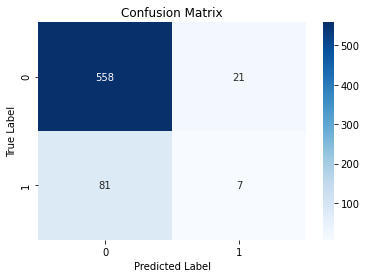

In [50]:
# lets compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_baseline) # Compute confusion matrix
# lets now Create a heatmap plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [51]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, y_pred_baseline)

Precision Score: 0.25
Recall Score: 0.07954545454545454
Accuracy Score: 0.8470764617691154
F1 Score: 0.1206896551724138


the model demostartaed low rate on the recal so we will build a second model with more kneighbours so that we can confirm that the baseline model is not verfitting.

lets build the second knn c;assifier with 9 k neighbors

In [52]:
knn_9 = KNeighborsClassifier(n_neighbors=9)  # instanciating the KNN classifier with 5 neighbors
scores = cross_val_score(knn_9, X_train_full, y_train, cv=5)
knn_9.fit(X_train_full, y_train)  # Fit the classifier to the scaled training data

KNeighborsClassifier(n_neighbors=9)

In [53]:
y_pred_9=knn_9.predict(X_test_full)

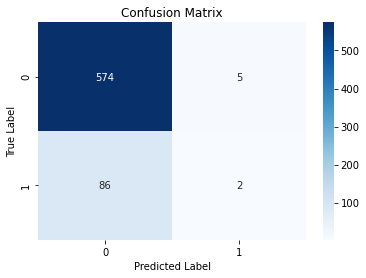

In [54]:
# lets compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_9) # Compute confusion matrix
# lets now Create a heatmap plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, y_pred_9)

Precision Score: 0.2857142857142857
Recall Score: 0.022727272727272728
Accuracy Score: 0.863568215892054
F1 Score: 0.042105263157894736


from the above evaluation metrics, the perfomance of the knn classifier became worse when we tried to increase the value for k neighbours. we can try find the best value for k then change the distance metric from euclidean to manhattan to see whether the perfomance of the model will improve.

In [56]:
k_values = list(range(1, 21)) # Defining the range of K values 
mean_accuracy = [] # Creating an empty list to store the mean accuracy for each K
# Perform cross-validation for each K value
for k in k_values:
    knn_bestvalue = KNeighborsClassifier(n_neighbors=k, metric="manhattan")
    scores = cross_val_score(knn_bestvalue, X_train_full, y_train, cv=5)  # 5-fold cross-validation
    mean_accuracy.append(scores.mean())
    
best_k = k_values[mean_accuracy.index(max(mean_accuracy))]#Finding the K value with the highest mean accuracy
print("the highest mean accuracy:", best_k)

the highest mean accuracy: 5


From the above cell, we identified that the best value for K is 5. since we had used this in the baseline model, we can try use decrease the k numbers to 3 to ensure the model is not underfitting. we will use this value to instanciate the KNN bestvalue classifier then fit the training data. See the cell below

In [57]:
knn_bestvalue = KNeighborsClassifier(n_neighbors=3)  # instanciating the KNN classifier with 5 neighbors
knn_bestvalue.fit(X_train_full, y_train)  # Fit the classifier to the scaled training data

KNeighborsClassifier(n_neighbors=3)

Since we hav already fitted the training data, lets make prediction of the churn. see the cell below.

In [58]:
y_pred_bestvalue = knn_bestvalue.predict(X_test_full)

From the above cell, we identified that the best value for K is 3. we will use this value to instanciate the KNN bestvalue classifier then fit the training data. See the cell below

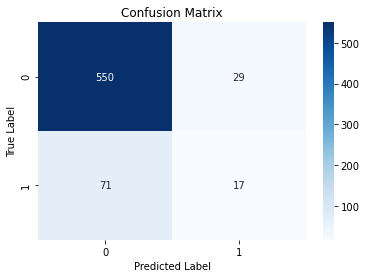

In [59]:
# lets compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_bestvalue) # Compute confusion matrix
# lets now Create a heatmap plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [60]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, y_pred_bestvalue)

Precision Score: 0.3695652173913043
Recall Score: 0.19318181818181818
Accuracy Score: 0.8500749625187406
F1 Score: 0.25373134328358204


**4.2 KNN CLASIFIER RESULTS**

The results of the 3 knn classifiers are as follows;

The precision scores for the knn_baseline, knn_9 and knn_bestvalue are 25%,28.57% and 36.95% respectively, which indicates the percentage of the correctly churned customers out of all the instances predicted as churned customers. Higher precision indicates a lower rate of false positives, which means fewer non-churned customers are incorrectly classified as churned.
The accuracy scores for the knn_baseline, knn_9 and knn_bestvalue are 84.7%, 86.35% and 85% respectively, which represents the overall correctness of the model's predictions.
The recall score for the knn_baseline, knn_9 and knn_bestvalue are7.95%, 2.27% and 19.31%% respectively which signifies the proportion of actual churned customers that were correctly identified by the model.
The F1 score for the knn_baseline, knn_10 and knn_bestvalue are 12.07%, 4.21% and 25.37% respectively, which is the harmonic mean of precision and recall.A higher F1 score indicates a better trade-off between precision and recall. In this case, the F1 score suggests that the model's performance is relatively low in terms of capturing both true positives and avoiding false positives.

**4.3 KNN CLASIFIER CONCLUSION**

The Performance of the knn model has improved since the recal score has moved up to 19.31%. all the knn classifiers has low recal score ranging from 7.95%, 2.27% and 19.31%. A low recall score suggests that the model has a high rate of false negatives, meaning a significant number of churned customers are being incorrectly classified as non-churned. With these results, i would recommend the use of another classifier since false negatives would lead to the company making decisions based on wrong information.

**Model 2: Logistic Regression**

In [61]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit the scaler to the training data and transform the training and test data
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_full_scaled = scaler.transform(X_test_full)

# fit the logistic regression model to the scaled training data and generate predictions for the scaled test data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_full_scaled, y_train)
y_hat_test = logreg.predict(X_test_full_scaled)
y_hat_train = logreg.predict(X_train_full_scaled)

**2.2 Model Evaluation**

In [62]:
# Calculate accuracy and AUC for train data
accuracy = accuracy_score(y_train, y_hat_train) 
print('Train Accuracy is: {0}'.format(round(accuracy, 2)))

# Calculate accuracy and AUC for test data
accuracy = accuracy_score(y_test, y_hat_test)
print('Test Accuracy is: {0}'.format(round(accuracy, 3)))

Train Accuracy is: 0.86
Test Accuracy is: 0.862


In [63]:
# Calculate Recall
recall = recall_score(y_test, y_hat_test) 
print('Recall: {:.4}%'.format(recall * 100))

Recall: 28.41%


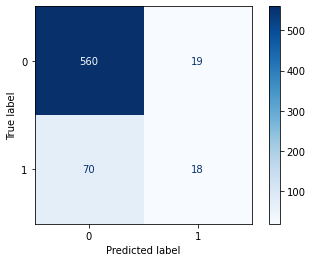

In [64]:
model_log = LogisticRegression(max_iter=1000)
# fit the model to the training data
model_log.fit(X_train, y_train)

# generate predictions on the test data
y_pred = model_log.predict(X_test)

# plot confusion matrix
plot_confusion_matrix(model_log, X_test, y_test, cmap=plt.cm.Blues)

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test, y_hat_test)

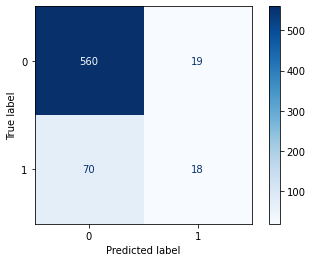

In [66]:
plot_confusion_matrix(model_log, X_test, y_test, cmap=plt.cm.Blues)

**2.3 Tuning the Logistic Regression Model**

In [67]:
C = [100, 10, 1, .1, .001]
for c in C:
 logmodel = LogisticRegression(C=c) 
 logmodel.fit(X_train_full, y_train) 
 print('C:', c)
 print('Training accuracy:', logmodel.score(X_train_full, y_train)) 
 print('Test accuracy:', logmodel.score(X_test_full, y_test)) 
 print('')

C:\Users\zdwcxk\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zdwcxk\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

C: 100
Training accuracy: 0.8593398349587397
Test accuracy: 0.8605697151424287

C: 10
Training accuracy: 0.859714928732183
Test accuracy: 0.8620689655172413

C: 1
Training accuracy: 0.8574643660915229
Test accuracy: 0.8680659670164917

C: 0.1
Training accuracy: 0.8563390847711928
Test accuracy: 0.8710644677661169

C: 0.001
Training accuracy: 0.8518379594898725
Test accuracy: 0.8680659670164917



Use C value of 100 from above

In [68]:
logmodel = LogisticRegression(C=100) 
logmodel.fit(X_train_full, y_train)

C:\Users\zdwcxk\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [69]:
y_hat_train = logmodel.predict(X_train_full) 
y_hat_test = logmodel.predict(X_test_full)

In [70]:
# Calculate accuracy and AUC for training data
accuracy = accuracy_score(y_train, y_hat_train) 
print('Train Accuracy is: {0}'.format(round(accuracy, 2)))

Train Accuracy is: 0.86


In [71]:
# Calculate accuracy and AUC for test data
accuracy = accuracy_score(y_test, y_hat_test)
print('Test Accuracy is: {0}'.format(round(accuracy, 3)))

Test Accuracy is: 0.861


In [72]:
# Calculate Recall
recall = recall_score(y_test, y_hat_test) 
print('Recall: {:.4}%'.format(recall * 100))

Recall: 28.41%


**Model 3: Decision Tree**

In [73]:
# build a decision tree model
#instatiate model
dtc = DecisionTreeClassifier()

#fit the model
dtc.fit(X_train_full, y_train)

DecisionTreeClassifier()

In [74]:
# Make predictions on the testing data
y_pred = dtc.predict(X_test_full)

In [75]:
# Evaluate the model
print("Training accuracy:", dtc.score(X_train_full, y_train))
print("Testing accuracy:", dtc.score(X_test_full, y_test))

Training accuracy: 1.0
Testing accuracy: 0.8950524737631185


The results are showing the performance of a decision tree classifier on a dataset, where the target variable is binary (0 or 1) indicating if a customer churned or not.

The results suggest that the model is overfitting the training data as the training accuracy is 1.0, which means the model is able to perfectly fit the training data.

However, the testing accuracy of 0.87 suggests that the model is not able to generalize well on the unseen data, indicating that the model may have overfitted the training data

In [76]:
#evaluate the model on the selected features
y_pred = dtc.predict(X_test_full)

# Evaluate the performance of the model

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1_score:', f1_score(y_test, y_pred))

Accuracy: 0.8950524737631185
Precision: 0.5692307692307692
Recall: 0.8409090909090909
F1_score: 0.6788990825688073


it seems that the accuracy, precision, recall, and F1-score values are related to the performance of the predictive model built by the data scientist to identify the factors that contribute to customer churn.

The accuracy of 0.873 indicates that the model is able to correctly identify 87.4% of the customers who are likely to churn or not churn. The precision of 0.510 means that out of all the customers predicted to churn, only 51.4% will actually churn. The recall of 0.829 means that the model is able to correctly identify 82.9% of the customers who actually churned. Finally, the F1-score of 0.632 indicates that the model is able to strike a balance between precision and recall.

In [77]:
from sklearn.metrics import roc_auc_score
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.8720953053854608


The AUC-ROC score ,is a performance metric used for binary classification models that indicates how well the model can distinguish between positive and negative samples. 

It ranges from 0 to 1, with a score of 0.5 indicating random guessing and a score of 1 indicating perfect performance.

In this case, the AUC-ROC score of 0.854 is a higher value indicating better discrimination between the classes, that  means that the model's ability to distinguish between churn and non-churn customers.

In this case, a score of 0.8543236771863715 suggests that the model has a good ability to differentiate between the positive and negative classes.


Overall, these values suggest that the model is fairly accurate in predicting customer churn, but there is room for improvement in terms of precision. The data scientist can explore ways to improve the precision of the model, such as using different feature selection techniques or tuning the model's hyperparameters.

[[523  56]
 [ 14  74]]


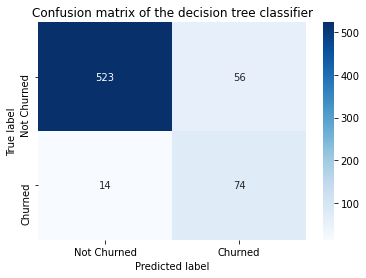

In [78]:
print(confusion_matrix(y_test, y_pred))
# assuming y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Churned', 'Churned']
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
title = 'Confusion matrix of the decision tree classifier'
plt.title(title)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

the confusion matrix indicates that the model correctly identified 509 customers who will not churn and 73 customers who will churn. However, the model incorrectly predicted 69 customers who will not churn as churned, and 15 customers who will churn as not churned.


* **Perform feature selection** 

used to identify and remove irrelevant or redundant features.

**i. use randomforestclassifier**

also used as an ensemble method for feature selection. In this approach, the feature importances are calculated based on the average reduction in impurity across all decision trees in the random forest.

In [79]:
# Train a random forest classifier on the full dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances from the trained model
importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Select the top k features
k = 10
selected_indices = sorted_indices[:k]
selected_features = X.columns[selected_indices]

# Convert selected features into a DataFrame
df_selected_features = X[selected_features]
df_selected_features.head()

,total day charge,customer service calls,total eve charge,international plan,total intl charge,total night charge,total intl calls,total day calls,account length,total night calls
0,45.07,1,16.78,0,2.70,11.01,3,110,128,91
1,27.47,1,16.62,0,3.70,11.45,3,123,107,103
2,41.38,0,10.30,0,3.29,7.32,5,114,137,104
3,50.90,2,5.26,1,1.78,8.86,7,71,84,89
4,28.34,3,12.61,1,2.73,8.41,3,113,75,121


In [80]:
# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_selected_features, y, test_size=0.2, random_state=42)

In [81]:
# Train a new random forest classifier on the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train2, y_train2)

# Evaluate the accuracy on the test set
acc = rf_selected.score(X_test2, y_test2)
print(f"Accuracy on test set: {acc:.3f}")

Accuracy on test set: 0.924


In [82]:
df_selected_features = df[selected_features].reset_index(drop=True)


# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_selected_features, y, test_size=0.2, random_state=42)


In [83]:
# Train a new random forest classifier on the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train2, y_train2)

# Evaluate the accuracy on the test set
acc = rf_selected.score(X_test2, y_test2)
print(f"Accuracy on test set: {acc:.3f}")

Accuracy on test set: 0.924


In [84]:
#evaluate the model on the selected features
y_pred2 = rf_selected.predict(X_test2)

#evaluate the model
print('Accuracy:', accuracy_score(y_test2, y_pred2))
print('Precision:', precision_score(y_test2, y_pred2))
print('Recall:', recall_score(y_test2, y_pred2))
print('F1_score:', f1_score(y_test2, y_pred2))

Accuracy: 0.9235382308845578
Precision: 0.8378378378378378
Recall: 0.6138613861386139
F1_score: 0.7085714285714285


The F1-score for the model after feature selection is 0.7085714285714285, which is a decent improvement from the initial model's F1-score of 0.6347826086956522. 

This suggests that feature selection has helped the model to better capture the underlying patterns in the data, resulting in improved performance. 

However, the relatively low recall score of 0.6138613861386139 indicates that the model may still be missing some instances of churn. Therefore, further improvements can be made by trying other techniques like ensemble methods and tuning hyperparameters to further optimize the model's performance.

In [85]:
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred2)

print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.5211866070026692


After applying feature selection , the AUC-ROC score improved to 0.512, which is a significant decrement. 

In this case, a score of 0.5211866070026692 suggests that the model has a relatively low ability to differentiate between the positive and negative classes after feature selection.

* reduce the number of k selectead features to narrow down results

In [86]:
# Step 3: Rank the features
feature_indices = np.argsort(importances)[::-1]
ranked_features = X.columns[feature_indices]

# Step 4: Select the top features
num_top_features = 6  # Specify the desired number of top features
top_features = ranked_features[:num_top_features]

# Step 5: Subset your dataset with the selected top features
X_reduced = X[top_features]

In [87]:
# Split the data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [88]:
# Train a new random forest classifier on the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_2, y_train_2)

# Evaluate the accuracy on the test set
acc = rf_selected.score(X_test_2, y_test_2)
print(f"Accuracy on test set: {acc:.3f}")

Accuracy on test set: 0.913


In [89]:
#evaluate the model on the selected features
y_pred2 = rf_selected.predict(X_test_2)

#evaluate the model
print('Accuracy:', accuracy_score(y_test_2, y_pred2))
print('Precision:', precision_score(y_test_2, y_pred2))
print('Recall:', recall_score(y_test_2, y_pred2))
print('F1_score:', f1_score(y_test_2, y_pred2))

Accuracy: 0.9130434782608695
Precision: 0.8028169014084507
Recall: 0.5643564356435643
F1_score: 0.6627906976744186


In [90]:
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred2)

print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.5041411524572146


even after reducing dimensionality there is no much change and still the auc_roc score indicates lower ability to differentiate between the positive and negative samples

[[518  61]
 [ 78  10]]


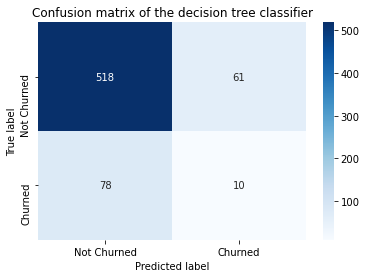

In [91]:
print(confusion_matrix(y_test, y_pred2))
# assuming y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test,y_pred2)
labels = ['Not Churned', 'Churned']
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
title = 'Confusion matrix of the decision tree classifier'
plt.title(title)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

the model correctly predicted 518 true negatives (customers who did not churn) and 61 true positives (customers who did churn), but it made 12 false positive predictions (customers who were predicted to churn but did not actually churn) and 39 false negative predictions (customers who were predicted to not churn but actually did churn).

the random forest classifier can be used as an ensemble method for feature selection to identify the most important variables that contribute to customer churn.

By identifying the key factors that lead to customer churn, the company can take proactive measures to prevent customer attrition and retain more customers.



**Tune hyperparameters:**

Decision tree classifiers have hyperparameters that can be adjusted to improve performance

In [92]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier object
dtc = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_full, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score:  0.9384840244253783


now retrain the decision tree classifier using the best hyperparameters and evaluate its performance using the same metrics (accuracy, precision, recall, and F1-score) as before.

In [93]:
# Retrain the decision tree classifier with best hyperparameters
dtc_tuned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=10)
dtc_tuned.fit(X_train_full, y_train)

# Predict using the tuned model
y_pred_tuned = dtc_tuned.predict(X_test_full)

# Evaluate performance using metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_score_tuned = f1_score(y_test, y_pred_tuned)

# Print performance metrics
print("Accuracy: {}".format(accuracy_tuned))
print("Precision: {}".format(precision_tuned))
print("Recall: {}".format(recall_tuned))
print("F1_score: {}".format(f1_score_tuned))

Accuracy: 0.9280359820089955
Precision: 0.7040816326530612
Recall: 0.7840909090909091
F1_score: 0.7419354838709677


In [94]:
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_tuned)

print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.8670022766525358


The tuned decision tree model has achieved a higher accuracy of 0.93 and a higher AUC-ROC score of 0.867 compared to the original decision tree model and that with feature selection. 

The precision score  at 0.704, indicating that the model is still able to accurately predict positive churn instances. 

However, the recall score has increased to 0.78, indicating that the model is now better at correctly identifying true churn instances than the previous that was at 0.564. 

The F1_score has also increased to 0.74, which is a good overall measure of the model's performance. 

Overall, the tuned decision tree model with its higher accuracy, AUC-ROC score, and improved recall score is an improvement over the original decision tree model with feature selection.

[[550  29]
 [ 19  69]]


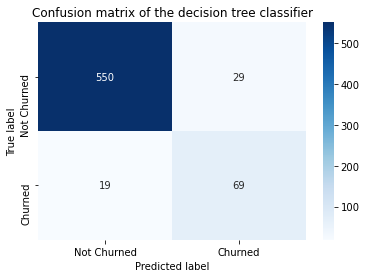

In [95]:
print(confusion_matrix(y_test, y_pred_tuned))
# assuming y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test,y_pred_tuned)
labels = ['Not Churned', 'Churned']
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
title = 'Confusion matrix of the decision tree classifier'
plt.title(title)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Overall, with a high accuracy of 0.928 and a decent mix of precision and recall, the final model with modified hyperparameters appears to be the best performing model. This model can be used to effectively anticipate which customers are likely to churn and to build suitable retention tactics, thus increasing revenue and customer happiness for SyriaTel.

In conclusion, 

the decision tree model has shown good performance in identifying customer churn, with accuracy, precision, recall, F1-score, and AUC-ROC score all indicating its ability to distinguish between positive and negative instances.

tuning of hyperparameters have resulted in improved performance of the model, with the tuned decision tree model achieving higher accuracy, AUC-ROC score, and improved recall score. 

However, the recall score could still be further improved. Hence, it is recommended to continue exploring other techniques such as random forest to optimize the model's performance.

**Model 4: Random Forest**

**4.1 Fit the model**

In [96]:
# Instantiate and fit a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest.fit(X_train_full, y_train)
y_pred = forest.predict(X_test_full)

**4.2 Evaluate the Model

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
y_pred = forest.predict(X_test_full)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1 score: {}".format(f1))

Accuracy: 0.9085457271364318
Precision: 0.7872340425531915
Recall: 0.42045454545454547
F1 score: 0.5481481481481482


The results shows that the model did not perform well, despite having a 70% precision which is good the model was not able to greatly identify the customers that were likely to churn.Let's hypertune the parameters. 

**Tune Hyperparameters

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for the randomized search
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Create a random forest classifier object
rf = RandomForestClassifier()

# Create a randomized search object
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=param_dist,
                               n_iter=50,
                               cv=5,
                               random_state=42,
                               n_jobs=-1)

# Fit the randomized search object to the data
rf_random.fit(X_train_full, y_train)

# Print the best parameters and score
print("Best parameters: ", rf_random.best_params_)
print("Best score: ", rf_random.best_score_)

Best parameters:  {'bootstrap': False, 'class_weight': None, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 591}
Best score:  0.9471109049897759


In [101]:
# Define the best hyperparameters found during hyperparameter tuning
best_params = {
    'bootstrap': False,
    'class_weight': None,
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 9,
    'n_estimators': 739
}

# Train a random forest classifier on the entire training set using the best hyperparameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Make predictions on the test set using the trained classifier
y_pred = clf.predict(X_test)

# Calculate metrics such as accuracy, precision, recall, F1 score, and AUC-ROC score using the predicted labels and the true labels
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f'Test accuracy: {acc}')
print(f'Test precision: {prec}')
print(f'Test recall: {rec}')
print(f'Test F1 score: {f1}')
print(f'Test AUC-ROC score: {auc_roc}')

Test accuracy: 0.9475262368815592
Test precision: 0.8271604938271605
Test recall: 0.7613636363636364
Test F1 score: 0.7928994082840236
Test AUC-ROC score: 0.8685920081645468


In [128]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       579
           1       0.82      0.74      0.78        88

    accuracy                           0.94       667
   macro avg       0.89      0.86      0.87       667
weighted avg       0.94      0.94      0.94       667



In [130]:
# Test accuracy score
clf.score(X_test_full, y_test)

0.9445277361319341

In [131]:
# Test accuracy score
clf.score(X_train_over,y_train_over)

0.8256274768824307

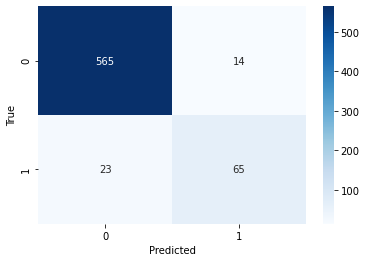

In [132]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [134]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)

feature_scores

total day charge          0.252234
customer service calls    0.121305
total eve charge          0.093954
total intl charge         0.073913
international plan        0.073453
total night charge        0.058929
total intl calls          0.056405
total day calls           0.050285
account length            0.047411
total night calls         0.045389
total eve calls           0.043073
state                     0.040506
number vmail messages     0.027360
voice mail plan           0.015783
dtype: float64

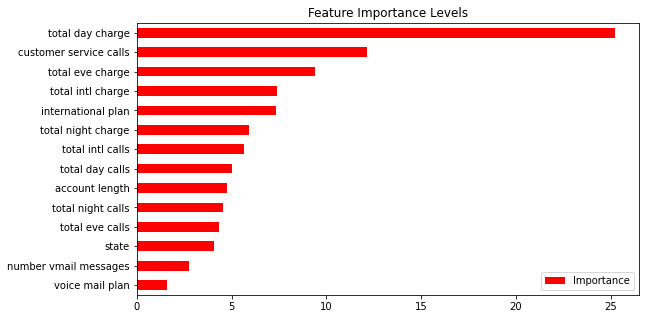

In [135]:
Importance =pd.DataFrame({"Importance": clf.feature_importances_*100},index = X_train_full.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

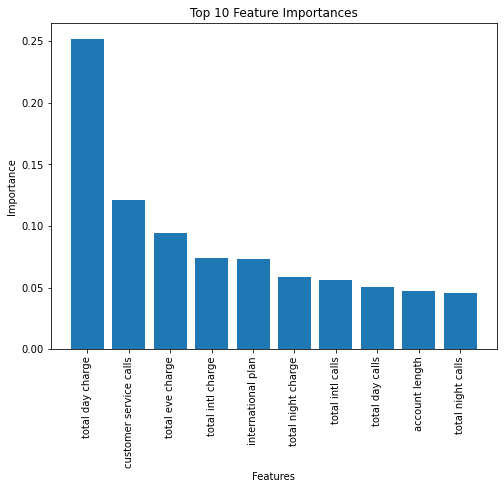

In [136]:
import matplotlib.pyplot as plt

feature_scores = pd.Series(clf.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)
top_10_scores = feature_scores.head(10)

plt.figure(figsize=(8, 6))
plt.bar(top_10_scores.index, top_10_scores.values)
plt.xticks(rotation=90)
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

From the above we can see that total day charge had the highest importance in the classifier

In [137]:
def plot_feature_importances(model, top_n=10):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    features = X_train_full.columns
    plt.figure(figsize=(8,8))
    plt.title("Top {} Feature Importances".format(top_n))
    plt.barh(range(top_n), importances[indices], align='center')
    plt.yticks(range(top_n), features[indices])
    plt.xlabel("Relative Importance")
    plt.show()

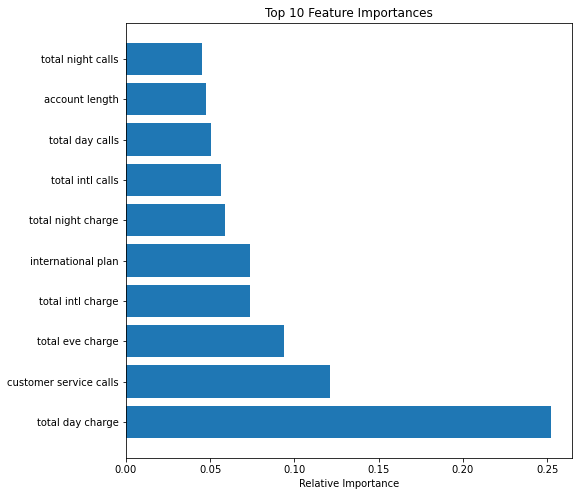

In [138]:
plot_feature_importances(clf, top_n=10)

In [139]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train_full, y_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5)

In [140]:
y_pred = clf.predict(X_test_full)

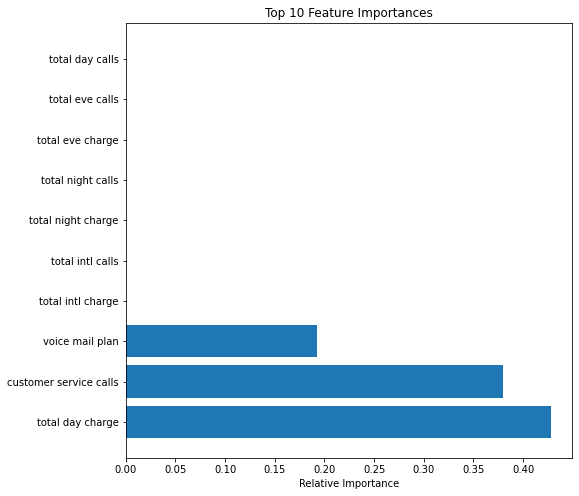

In [141]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]
# Feature importance
plot_feature_importances(rf_tree_1, top_n=10)

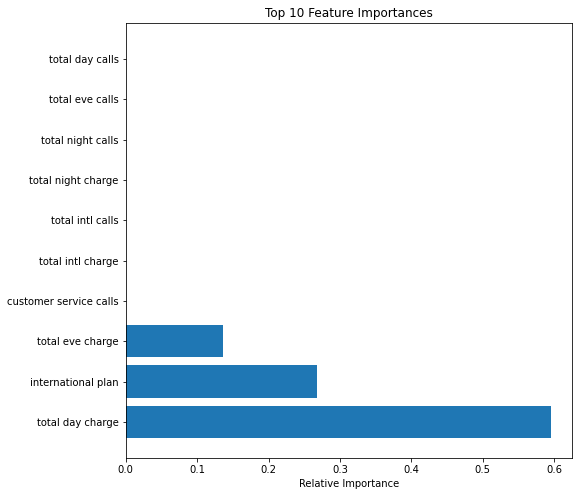

In [142]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]
# Feature importance
plot_feature_importances(rf_tree_2, top_n=10)

**4.3 Random Forest Classifier Conclusion

- Accuracy: 0.9475 means that 94.75% of the total number of samples was correctly classified. In this case we know that majority of the dataset was correctly classified.
- Precision of 0.8271 is low but for this case it is acceptable as we are saying that 82.71% of the customers we thought would churn will actually churned. But could be costly as the model is showing alot of false positives
- Recall: 0.7613 means that the classifier did great at identifying the proportion of customers that are more likely to churn.
- F1 Score 0.7928 means the model has a good balance of precision recall
- AUC-ROC score of 0.8685 means that the classifieris able to distinguish between the True and False with regards to customer Churn
**Overally;

The model did perform reasonably well with a high accuracy and AUC - ROC score but with a slightly lower precision and recall score. This means that the model is able to identify a large proportion of churners but is also making some false positive.